In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data_50 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Sample_50_1.csv")
data_50.head()

,time,timestamps,ax,ay,az,mag
0,18:19:12.645,19282,-1.07,0.16,-0.18,1.10
1,18:19:12.654,19304,-1.07,0.17,-0.18,1.10
2,18:19:12.681,19326,-1.08,0.15,-0.18,1.10
3,18:19:12.699,19348,-1.07,0.15,-0.17,1.10
4,18:19:12.748,19370,-1.08,0.16,-0.18,1.11


In [ ]:
data_50

,time,timestamps,ax,ay,az,mag
0,18:19:12.645,19282,-1.07,0.16,-0.18,1.10
1,18:19:12.654,19304,-1.07,0.17,-0.18,1.10
2,18:19:12.681,19326,-1.08,0.15,-0.18,1.10
3,18:19:12.699,19348,-1.07,0.15,-0.17,1.10
4,18:19:12.748,19370,-1.08,0.16,-0.18,1.11
...,...,...,...,...,...,...
611,18:19:26.091,32724,-1.03,0.34,-0.26,1.12
612,18:19:26.096,32746,-1.03,0.35,-0.26,1.12
613,18:19:26.122,32768,-1.04,0.33,-0.27,1.12
614,18:19:26.146,32790,-1.04,0.33,-0.25,1.12


In [ ]:
data_75 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Sample_75_1.csv")
data_100 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Sample_100_1.csv")
data_125 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Sample_125_1.csv")
data_150 = pd.read_csv("drive/MyDrive/project_csv_data/gait_Sample_150_1.csv")

In [ ]:
def avg_cycle(axis, fq):
  cycle1 = []

  dict = {50:63, 75:94, 100:125, 125:156, 150:188}

  window = dict[fq]

  for i in range(window):
    sum = 0;
    count = 0
    for j in range(i, len(axis), window):
      sum += axis[i]
      count += 1
    cycle1.append(sum/count)

  cycle1 = pd.DataFrame(cycle1)
  return cycle1

a50_mag = avg_cycle(data_50.mag, 50)

a75_mag = avg_cycle(data_75.mag, 75)

a100_mag = avg_cycle(data_100.mag, 100)

a125_mag = avg_cycle(data_125.mag, 125)

a150_mag = avg_cycle(data_150.mag, 150)

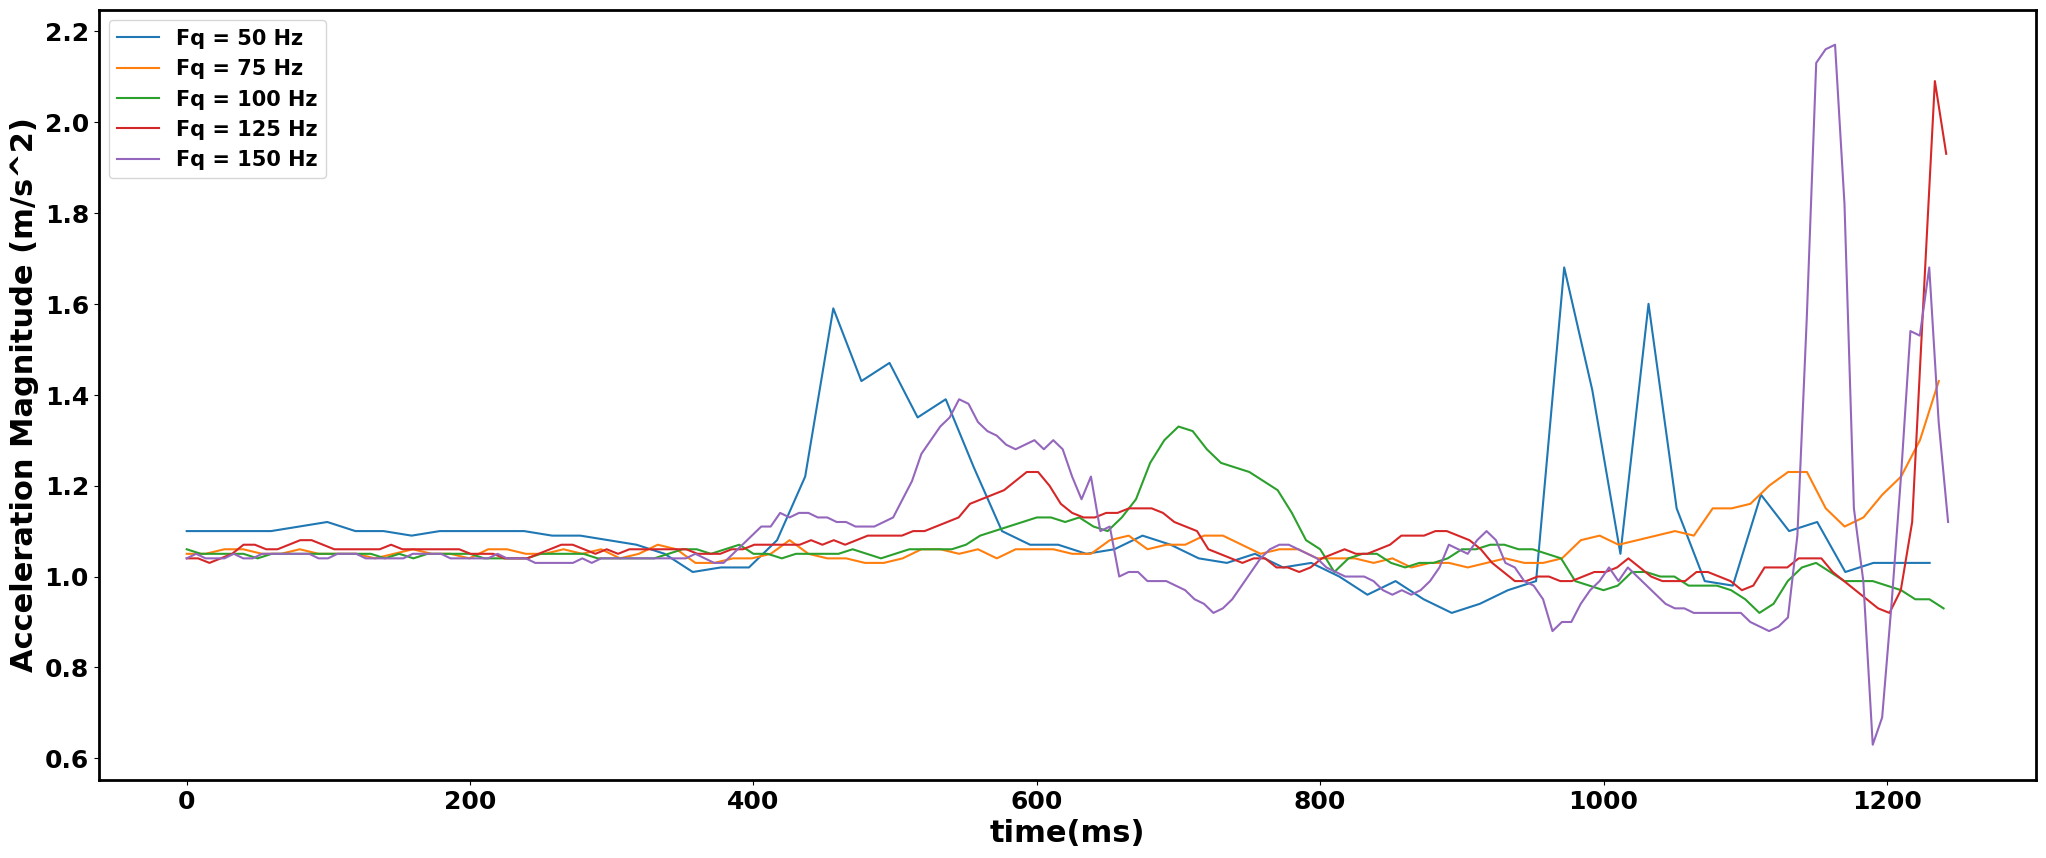

In [ ]:
plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':15, 'weight':'bold'}

# time50 = (data_50[:154].timestamps - data_50[:154].timestamps[0])
# time75 = data_75[:231].timestamps - data_75[:231].timestamps[0]
# time100 = data_100[:308].timestamps - data_100[:308].timestamps[0]
# time125 = data_125[:385].timestamps - data_125[:385].timestamps[0]
# time150 = data_150[:462].timestamps - data_150[:462].timestamps[0]


# X-Axis

time50 = pd.DataFrame(np.arange(0, 1250, 19.841269841269))[:-1]
time70 = pd.DataFrame(np.arange(0, 1250, 13.297))[:-1]
time100 = pd.DataFrame(np.arange(0, 1250, 10))
time125 = pd.DataFrame(np.arange(0, 1250, 8.012))[:-1]
time150 = pd.DataFrame(np.arange(0, 1250, 6.648))[:-1]

plt.plot(time50,a50_mag, label="Fq = 50 Hz")
plt.plot(time70,a75_mag, label="Fq = 75 Hz")
plt.plot(time100,a100_mag, label="Fq = 100 Hz")
plt.plot(time125,a125_mag, label="Fq = 125 Hz")
plt.plot(time150,a150_mag, label="Fq = 150 Hz")
# plt.plot(time3,data_b2_0S_1.ax, label="B2-No-Shoes")

plt.xlabel("time(ms)", fontsize=22, weight='bold')
plt.xticks(fontsize=18, weight='bold')
plt.ylabel("Acceleration Magnitude (m/s^2)", fontsize=22, weight='bold')
plt.yticks(fontsize=18, weight='bold')
plt.legend(prop = legend_prop)


In [ ]:
from scipy.signal import butter, filtfilt, find_peaks
from scipy.signal import savgol_filter


# Step 2: Preprocessing
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Choose cutoff frequency and filter the magnitude data
cutoff_frequency = 2.0  # Adjust as needed
fs = 100.0  # Sample rate (assuming timestamps are in milliseconds)
# df['mag_filtered_lp'] = butter_lowpass_filter(df['y'], cutoff_frequency, fs)

data_50['mag_filtered'] = butter_lowpass_filter(data_50['mag'], cutoff_frequency, 50)
data_75['mag_filtered'] = butter_lowpass_filter(data_75['mag'], cutoff_frequency, 75)
data_100['mag_filtered'] = butter_lowpass_filter(data_100['mag'], cutoff_frequency, 100)
data_125['mag_filtered'] = butter_lowpass_filter(data_125['mag'], cutoff_frequency, 125)
data_150['mag_filtered'] = butter_lowpass_filter(data_150['mag'], cutoff_frequency, 150)

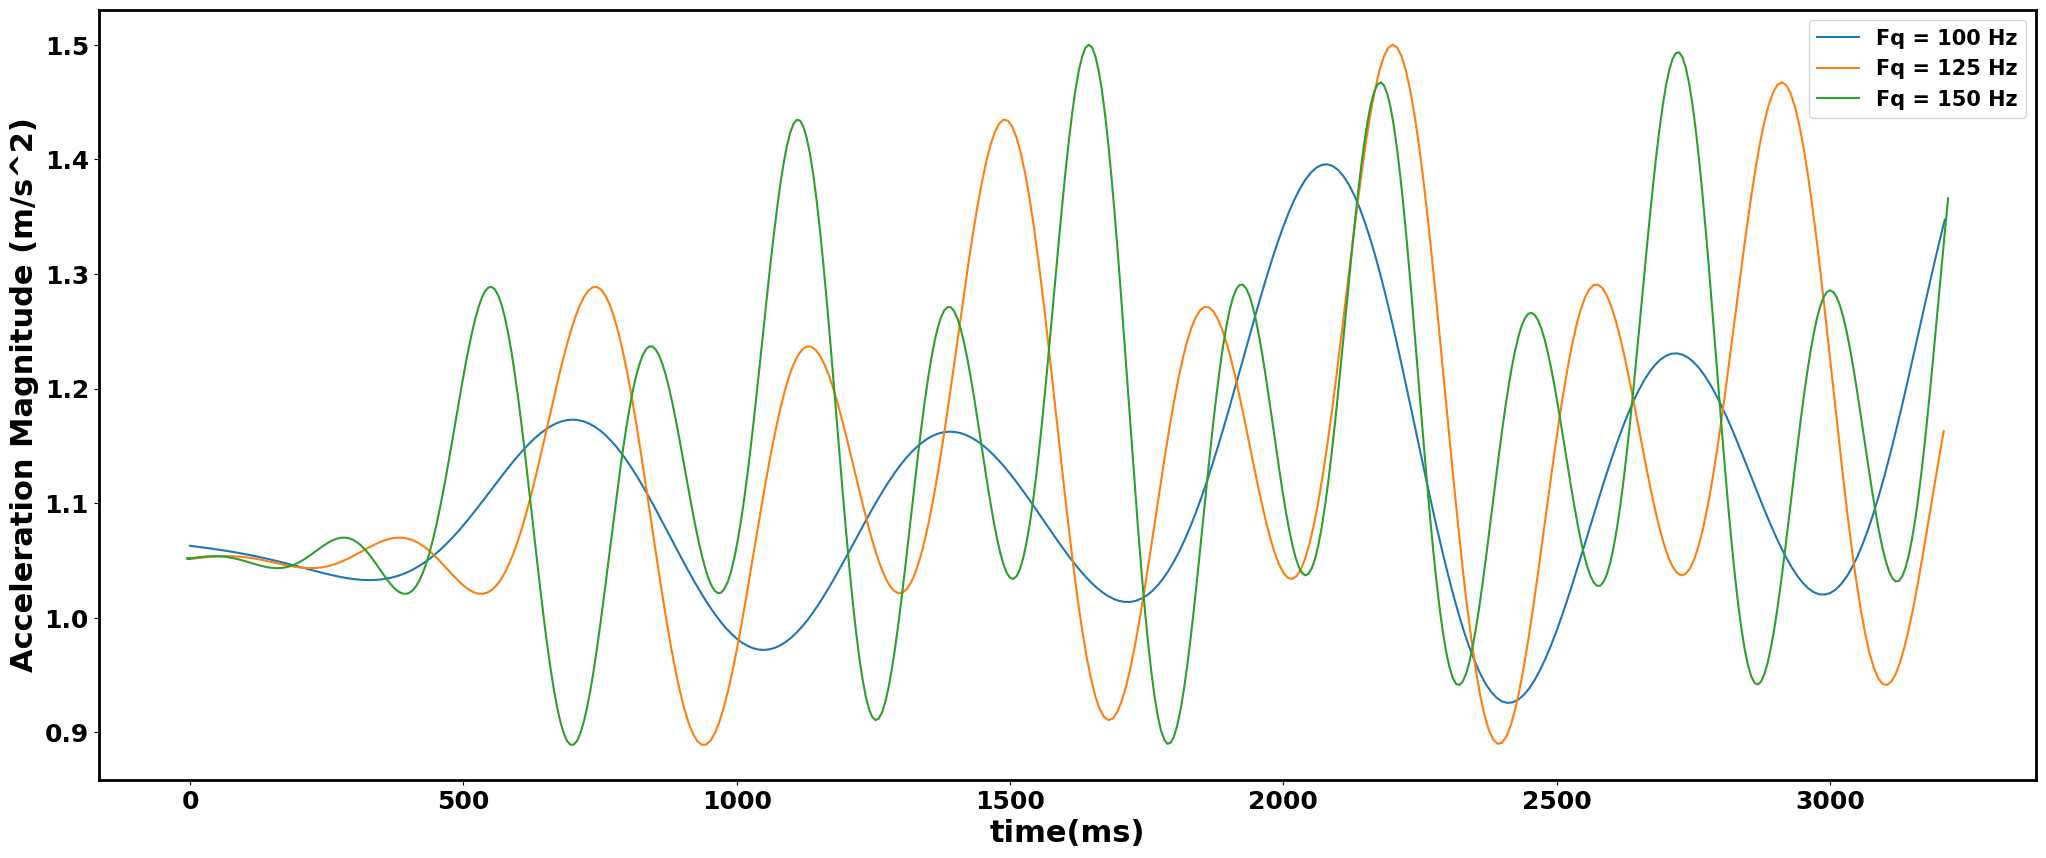

In [ ]:
plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':15, 'weight':'bold'}

time50 = (data_50[:147].timestamps - data_50[:147].timestamps[0])
time75 = data_75[:231].timestamps - data_75[:231].timestamps[0]
time100 = data_100[:322].timestamps - data_100[:322].timestamps[0]
time125 = data_125[:402].timestamps - data_125[:402].timestamps[0]
time150 = data_150[:538].timestamps - data_150[:538].timestamps[0]


# X-Axis

# time50 = pd.DataFrame(np.arange(0, 1250, 19.841269841269))[:-1]
# time70 = pd.DataFrame(np.arange(0, 1250, 13.297))[:-1]
# time100 = pd.DataFrame(np.arange(0, 1250, 10))
# time125 = pd.DataFrame(np.arange(0, 1250, 8.012))[:-1]
# time150 = pd.DataFrame(np.arange(0, 1250, 6.648))[:-1]

# plt.plot(time50, data_50[:147].mag_filtered, label="Fq = 50 Hz")
# plt.plot(time75,data_75[:231].mag_filtered, label="Fq = 75 Hz")
plt.plot(time100,data_100[:322].mag_filtered, label="Fq = 100 Hz")
plt.plot(time125,data_75[:402].mag_filtered, label="Fq = 125 Hz")
plt.plot(time150,data_75[:538].mag_filtered, label="Fq = 150 Hz")
# plt.plot(time3,data_b2_0S_1.ax, label="B2-No-Shoes")

plt.xlabel("time(ms)", fontsize=22, weight='bold')
plt.xticks(fontsize=18, weight='bold')
plt.ylabel("Acceleration Magnitude (m/s^2)", fontsize=22, weight='bold')
plt.yticks(fontsize=18, weight='bold')
plt.legend(prop = legend_prop)


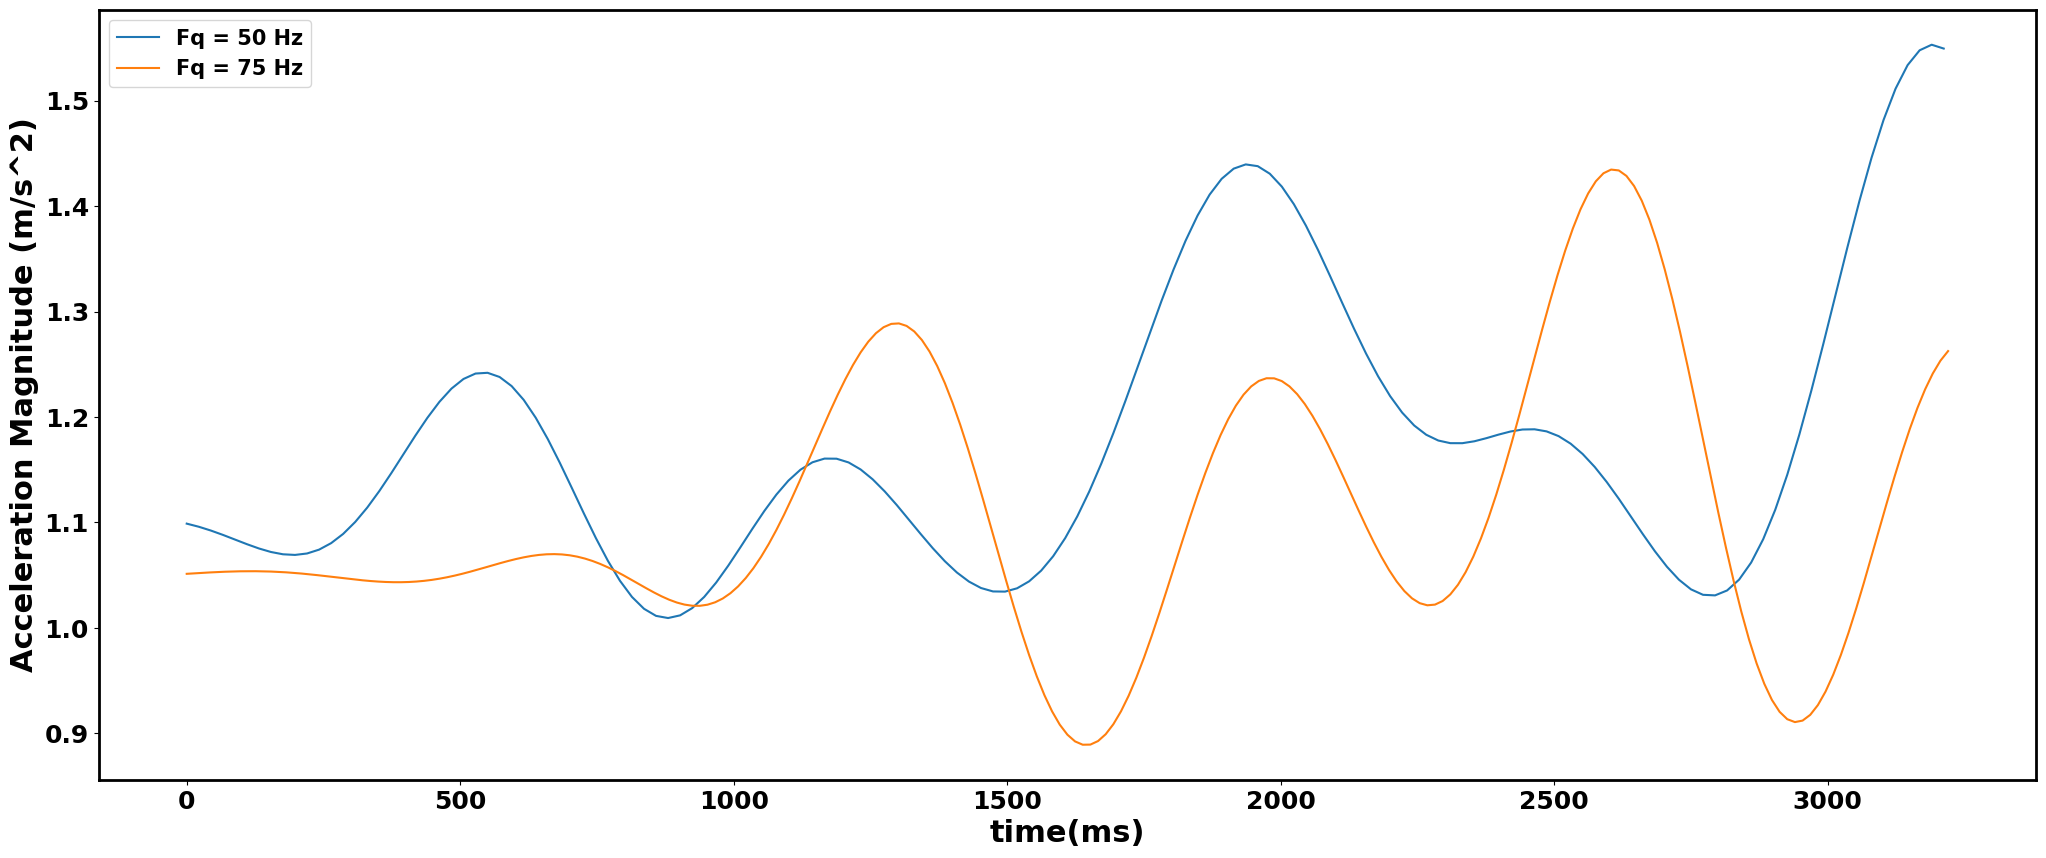

In [ ]:
plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':15, 'weight':'bold'}


# X-Axis

# time50 = pd.DataFrame(np.arange(0, 1250, 19.841269841269))[:-1]
# time70 = pd.DataFrame(np.arange(0, 1250, 13.297))[:-1]
# time100 = pd.DataFrame(np.arange(0, 1250, 10))
# time125 = pd.DataFrame(np.arange(0, 1250, 8.012))[:-1]
# time150 = pd.DataFrame(np.arange(0, 1250, 6.648))[:-1]

plt.plot(time50, data_50[:147].mag_filtered, label="Fq = 50 Hz")
plt.plot(time75,data_75[:231].mag_filtered, label="Fq = 75 Hz")
# plt.plot(time100,data_100[:322].mag_filtered, label="Fq = 100 Hz")
# plt.plot(time125,data_75[:402].mag_filtered, label="Fq = 125 Hz")
# plt.plot(time150,data_75[:538].mag_filtered, label="Fq = 150 Hz")
# plt.plot(time3,data_b2_0S_1.ax, label="B2-No-Shoes")

plt.xlabel("time(ms)", fontsize=22, weight='bold')
plt.xticks(fontsize=18, weight='bold')
plt.ylabel("Acceleration Magnitude (m/s^2)", fontsize=22, weight='bold')
plt.yticks(fontsize=18, weight='bold')
plt.legend(prop = legend_prop)


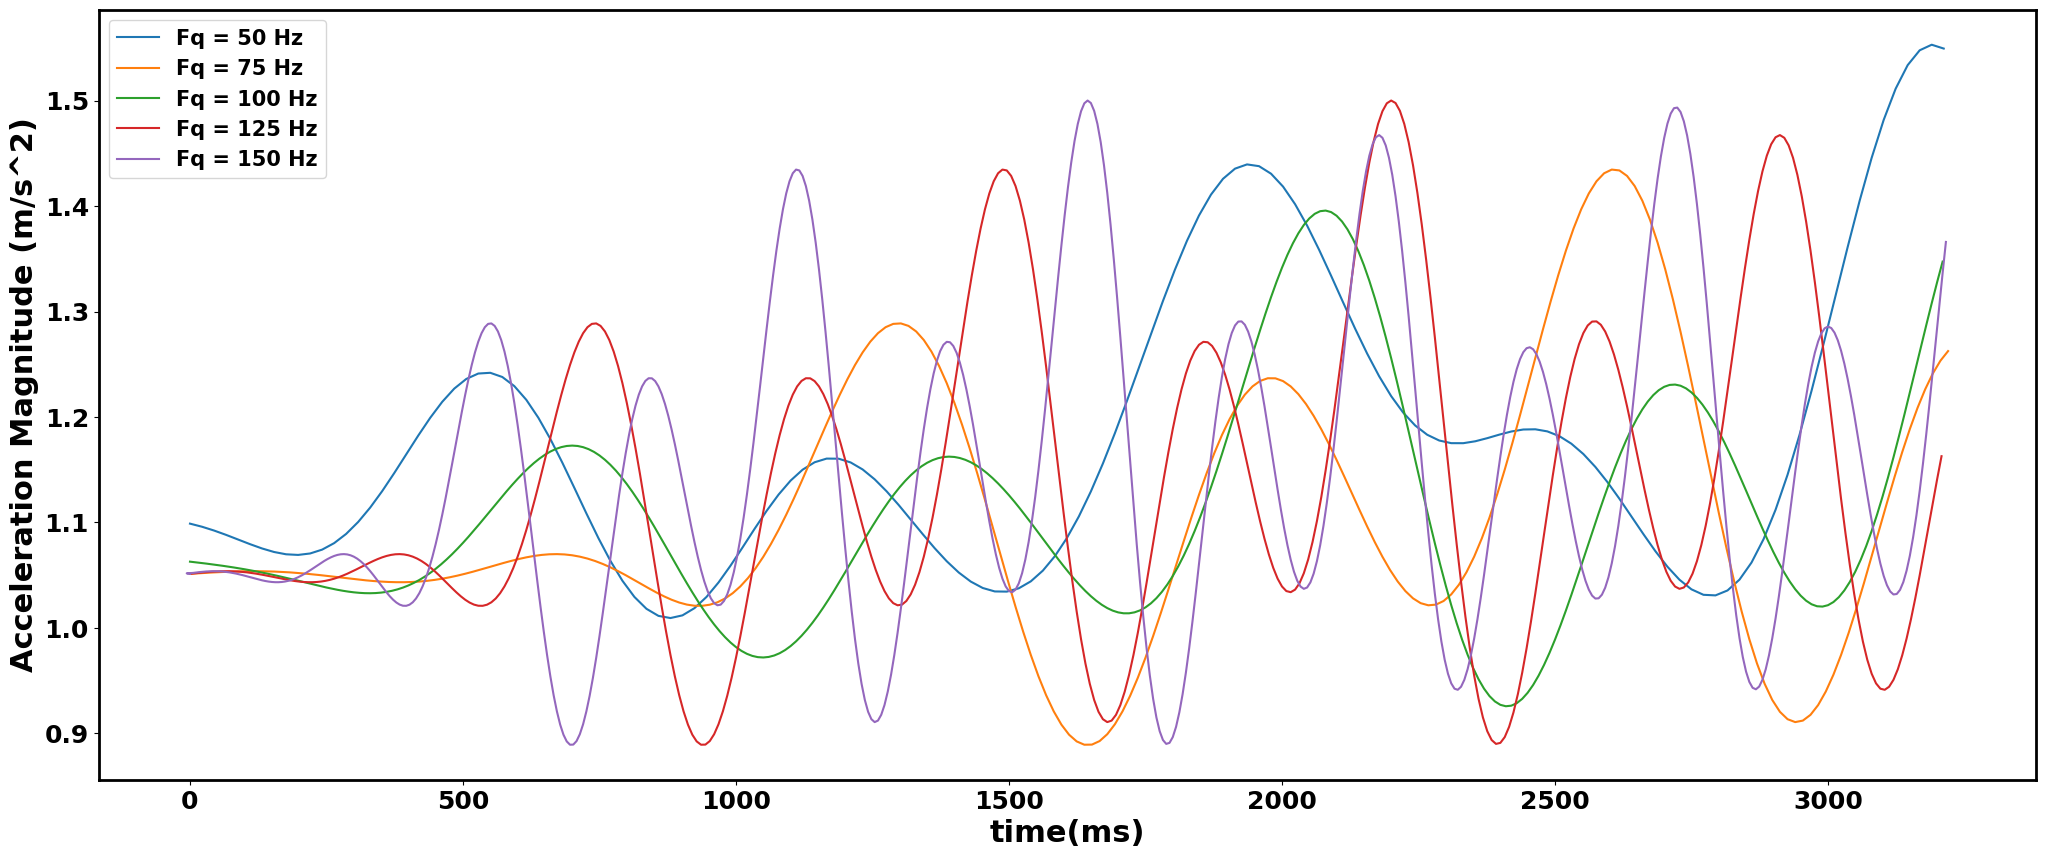

In [ ]:
plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':15, 'weight':'bold'}


# X-Axis

# time50 = pd.DataFrame(np.arange(0, 1250, 19.841269841269))[:-1]
# time70 = pd.DataFrame(np.arange(0, 1250, 13.297))[:-1]
# time100 = pd.DataFrame(np.arange(0, 1250, 10))
# time125 = pd.DataFrame(np.arange(0, 1250, 8.012))[:-1]
# time150 = pd.DataFrame(np.arange(0, 1250, 6.648))[:-1]

plt.plot(time50, data_50[:147].mag_filtered, label="Fq = 50 Hz")
plt.plot(time75,data_75[:231].mag_filtered, label="Fq = 75 Hz")
plt.plot(time100,data_100[:322].mag_filtered, label="Fq = 100 Hz")
plt.plot(time125,data_75[:402].mag_filtered, label="Fq = 125 Hz")
plt.plot(time150,data_75[:538].mag_filtered, label="Fq = 150 Hz")
# plt.plot(time3,data_b2_0S_1.ax, label="B2-No-Shoes")

plt.xlabel("time(ms)", fontsize=22, weight='bold')
plt.xticks(fontsize=18, weight='bold')
plt.ylabel("Acceleration Magnitude (m/s^2)", fontsize=22, weight='bold')
plt.yticks(fontsize=18, weight='bold')
plt.legend(prop = legend_prop)


### 100 Hz

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Parameters for peak detection
min_peak_height = 1.15  # Adjust based on your data
min_peak_distance = 1.25  # Adjust based on your data

# Detect peaks (heel-strikes and toe-offs)
peaks, _ = find_peaks(data_100.mag_filtered, height=min_peak_height, distance=min_peak_distance)

# Calculate stance and swing phases
gait_events = []
contact_time = []

for i in range(1, len(peaks), 2):
    heel_strike = peaks[i - 1]
    toe_off = peaks[i]
    gait_events.append((heel_strike, toe_off))
    contact_time.append((data_100.loc[heel_strike, 'timestamps'], data_100.loc[toe_off, 'timestamps']))

# Calculate swing and stance durations and step count
swing_phases = []
stance_phases = []
step_count = len(peaks)



# for i in range(1, len(peaks), 2):
#   contact_time.append((data_100.loc[peaks[i - 1], 'timestamps'], data_100.loc[peaks[i], 'timestamps']))

for i in range(len(gait_events)):
    stance_duration = data_100.loc[gait_events[i][1], 'timestamps'] - data_100.loc[gait_events[i][0], 'timestamps']
    stance_phases.append(stance_duration)
    if i != 0:
      swing_duration = data_100.loc[gait_events[i][0], 'timestamps'] - data_100.loc[gait_events[i-1][1], 'timestamps']
      swing_phases.append(swing_duration)

# Print extracted gait features
print("Swing Phases:")
for duration in swing_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStance Phases:")
for duration in stance_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStep Count:", step_count)


Swing Phases:
Duration: 690.00s
Duration: 590.00s
Duration: 570.00s
Duration: 630.00s
Duration: 640.00s
Duration: 640.00s
Duration: 650.00s
Duration: 650.00s
Duration: 630.00s

Stance Phases:
Duration: 690.00s
Duration: 640.00s
Duration: 630.00s
Duration: 650.00s
Duration: 670.00s
Duration: 660.00s
Duration: 670.00s
Duration: 670.00s
Duration: 700.00s
Duration: 700.00s

Step Count: 20


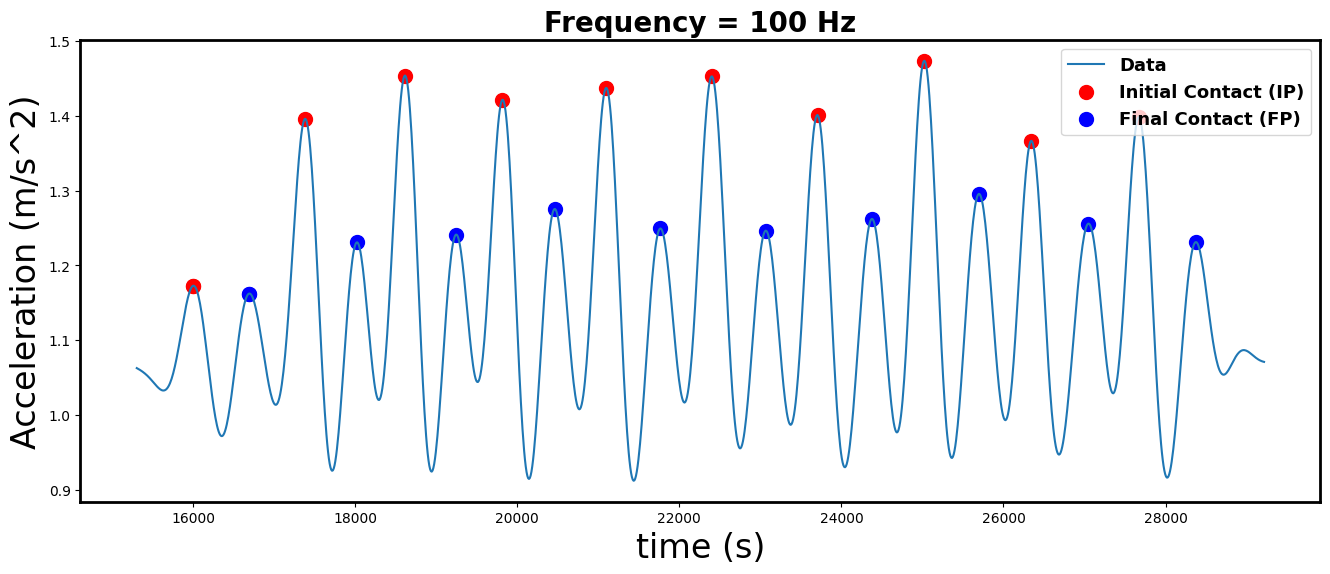

In [ ]:
plt.figure(figsize=(16, 6))

# plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':13, 'weight':'bold'}


plt.plot(data_100.timestamps, (data_100.mag_filtered), label='Data')

count = 0
for index in contact_time:
    interpolated_value_0 = np.interp(index[0], data_100.timestamps, (data_100.mag_filtered))  # Interpolate value at float index
    interpolated_value_1 = np.interp(index[1], data_100.timestamps, (data_100.mag_filtered))  # Interpolate value at float index

    if count == 0:
      plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100, label='Initial Contact (IP)')
      plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100, label='Final Contact (FP)')
    plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100)
    plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100)

    count += 1

plt.title("Frequency = 100 Hz", fontsize=20, weight='bold')
plt.legend(fontsize=10)
plt.xlabel("time (s)", fontsize=24)
plt.ylabel("Acceleration (m/s^2)", fontsize=24)
plt.legend(prop = legend_prop)

plt.show()

### 75 Hz

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Parameters for peak detection
min_peak_height = 1.1  # Adjust based on your data
min_peak_distance = 1.25  # Adjust based on your data

# Detect peaks (heel-strikes and toe-offs)
peaks, _ = find_peaks(data_50.mag_filtered, height=min_peak_height, distance=min_peak_distance)

# Calculate stance and swing phases
gait_events = []
contact_time = []

for i in range(1, len(peaks), 2):
    heel_strike = peaks[i - 1]
    toe_off = peaks[i]
    gait_events.append((heel_strike, toe_off))
    contact_time.append((data_50.loc[heel_strike, 'timestamps'], data_50.loc[toe_off, 'timestamps']))

# Calculate swing and stance durations and step count
swing_phases = []
stance_phases = []
step_count = len(peaks)



# for i in range(1, len(peaks), 2):
#   contact_time.append((data_50.loc[peaks[i - 1], 'timestamps'], data_50.loc[peaks[i], 'timestamps']))

for i in range(len(gait_events)):
    stance_duration = data_50.loc[gait_events[i][1], 'timestamps'] - data_50.loc[gait_events[i][0], 'timestamps']
    stance_phases.append(stance_duration)
    if i != 0:
      swing_duration = data_50.loc[gait_events[i][0], 'timestamps'] - data_50.loc[gait_events[i-1][1], 'timestamps']
      swing_phases.append(swing_duration)

# Print extracted gait features
print("Swing Phases:")
for duration in swing_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStance Phases:")
for duration in stance_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStep Count:", step_count)


Swing Phases:
Duration: 770.00s
Duration: 726.00s
Duration: 704.00s
Duration: 726.00s
Duration: 726.00s
Duration: 704.00s
Duration: 726.00s
Duration: 748.00s
Duration: 726.00s

Stance Phases:
Duration: 616.00s
Duration: 528.00s
Duration: 550.00s
Duration: 528.00s
Duration: 528.00s
Duration: 572.00s
Duration: 550.00s
Duration: 550.00s
Duration: 506.00s
Duration: 594.00s

Step Count: 21


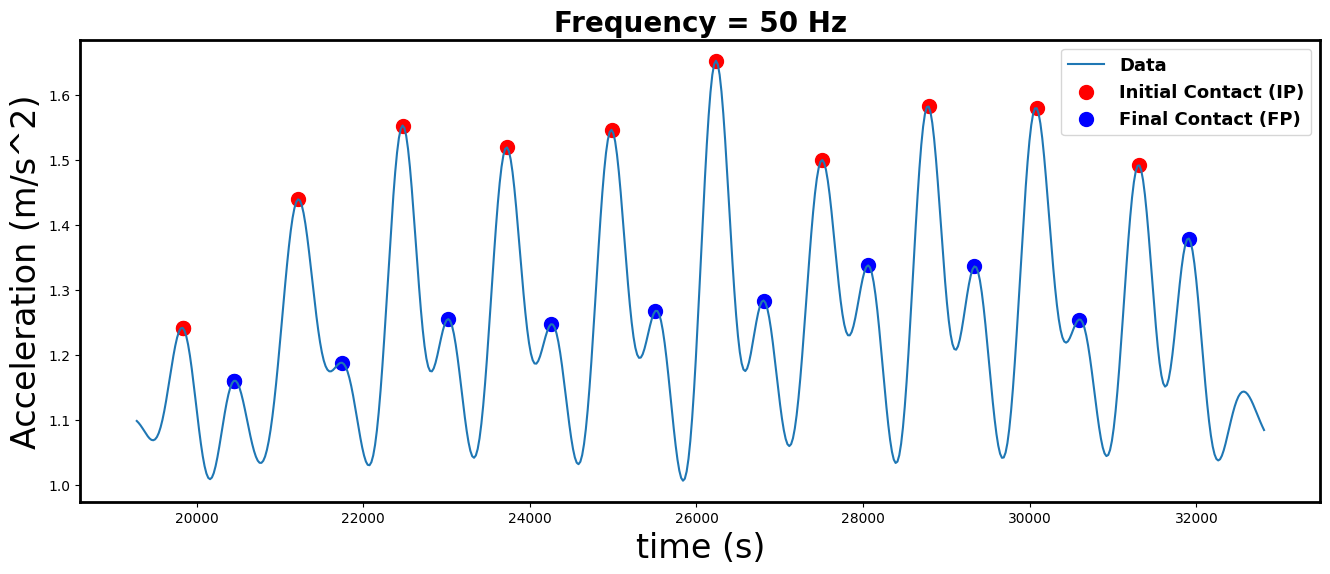

In [ ]:
plt.figure(figsize=(16, 6))

# plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':13, 'weight':'bold'}


plt.plot(data_50.timestamps, (data_50.mag_filtered), label='Data')

count = 0
for index in contact_time:
    interpolated_value_0 = np.interp(index[0], data_50.timestamps, (data_50.mag_filtered))  # Interpolate value at float index
    interpolated_value_1 = np.interp(index[1], data_50.timestamps, (data_50.mag_filtered))  # Interpolate value at float index

    if count == 0:
      plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100, label='Initial Contact (IP)')
      plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100, label='Final Contact (FP)')
    plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100)
    plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100)

    count += 1

plt.title("Frequency = 50 Hz", fontsize=20, weight='bold')
plt.legend(fontsize=10)
plt.xlabel("time (s)", fontsize=24)
plt.ylabel("Acceleration (m/s^2)", fontsize=24)
plt.legend(prop = legend_prop)

plt.show()

###75 Hz

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# Parameters for peak detection
min_peak_height = 1.15  # Adjust based on your data
min_peak_distance = 1.25  # Adjust based on your data

# Detect peaks (heel-strikes and toe-offs)
peaks, _ = find_peaks(data_75.mag_filtered, height=min_peak_height, distance=min_peak_distance)

# Calculate stance and swing phases
gait_events = []
contact_time = []

for i in range(1, len(peaks), 2):
    heel_strike = peaks[i - 1]
    toe_off = peaks[i]
    gait_events.append((heel_strike, toe_off))
    contact_time.append((data_75.loc[heel_strike, 'timestamps'], data_75.loc[toe_off, 'timestamps']))

# Calculate swing and stance durations and step count
swing_phases = []
stance_phases = []
step_count = len(peaks)



# for i in range(1, len(peaks), 2):
#   contact_time.append((data_75.loc[peaks[i - 1], 'timestamps'], data_75.loc[peaks[i], 'timestamps']))

for i in range(len(gait_events)):
    stance_duration = data_75.loc[gait_events[i][1], 'timestamps'] - data_75.loc[gait_events[i][0], 'timestamps']
    stance_phases.append(stance_duration)
    if i != 0:
      swing_duration = data_75.loc[gait_events[i][0], 'timestamps'] - data_75.loc[gait_events[i-1][1], 'timestamps']
      swing_phases.append(swing_duration)

# Print extracted gait features
print("Swing Phases:")
for duration in swing_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStance Phases:")
for duration in stance_phases:
    print(f"Duration: {duration:.2f}s")

print("\nStep Count:", step_count)


Swing Phases:
Duration: 630.00s
Duration: 602.00s
Duration: 588.00s
Duration: 630.00s
Duration: 616.00s
Duration: 588.00s
Duration: 588.00s
Duration: 630.00s
Duration: 602.00s

Stance Phases:
Duration: 672.00s
Duration: 644.00s
Duration: 658.00s
Duration: 644.00s
Duration: 644.00s
Duration: 672.00s
Duration: 658.00s
Duration: 644.00s
Duration: 686.00s
Duration: 658.00s

Step Count: 20


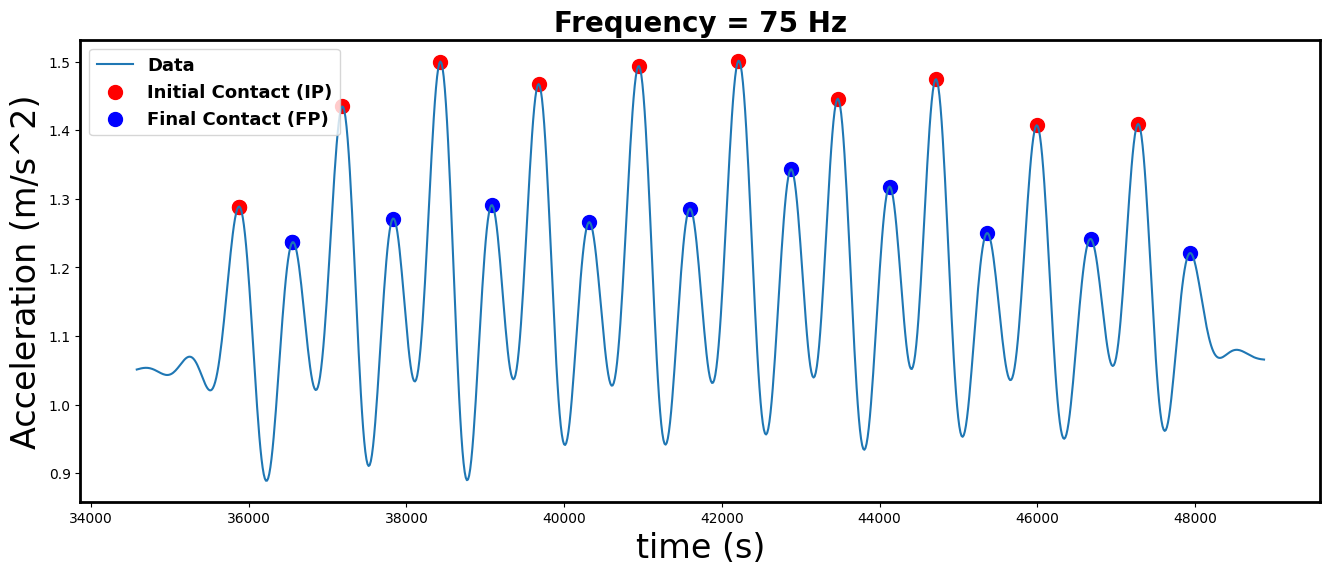

In [ ]:
plt.figure(figsize=(16, 6))

# plt.figure(figsize=(25, 10))


# Set the line thickness of the plot border
plt.rcParams['axes.linewidth'] = 2

legend_prop = {'size':13, 'weight':'bold'}


plt.plot(data_75.timestamps, (data_75.mag_filtered), label='Data')

count = 0
for index in contact_time:
    interpolated_value_0 = np.interp(index[0], data_75.timestamps, (data_75.mag_filtered))  # Interpolate value at float index
    interpolated_value_1 = np.interp(index[1], data_75.timestamps, (data_75.mag_filtered))  # Interpolate value at float index

    if count == 0:
      plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100, label='Initial Contact (IP)')
      plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100, label='Final Contact (FP)')
    plt.scatter(index[0], interpolated_value_0, color='red', marker='o', s=100)
    plt.scatter(index[1], interpolated_value_1, color='blue', marker='o', s=100)

    count += 1

plt.title("Frequency = 75 Hz", fontsize=20, weight='bold')
plt.legend(fontsize=10)
plt.xlabel("time (s)", fontsize=24)
plt.ylabel("Acceleration (m/s^2)", fontsize=24)
plt.legend(prop = legend_prop)

plt.show()